In [2]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, time
import pandas as pd
mat = scipy.io.loadmat('exampleCV_atMatlab/data.mat')

In [3]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [4]:
data = mat['data'][0][0]
type(data),data.shape

(numpy.void, ())

In [5]:
type(data[0]),data[0].shape,type(data[1]),data[1].shape

(numpy.ndarray, (84, 1190), numpy.ndarray, (84, 1))

In [6]:
data[0],data[1]

(array([[0.0530716 , 0.0772467 , 0.        , ..., 0.262905  , 0.00870984,
         0.271614  ],
        [0.0356869 , 0.0762979 , 0.        , ..., 0.345782  , 0.0253565 ,
         0.371138  ],
        [0.0529476 , 0.0567482 , 0.        , ..., 0.150802  , 0.0311162 ,
         0.181918  ],
        ...,
        [0.00564811, 0.0895224 , 0.        , ..., 0.264739  , 0.0034535 ,
         0.268192  ],
        [0.0485545 , 0.120048  , 0.        , ..., 0.228666  , 0.0176481 ,
         0.246314  ],
        [0.0039096 , 0.0453717 , 0.        , ..., 0.26317   , 0.0118474 ,
         0.275017  ]]), array([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
    

In [7]:
mtype = data.dtype  

In [8]:
ndata = {n: data[n] for n in mtype.names}
ndata

{'features': array([[0.0530716 , 0.0772467 , 0.        , ..., 0.262905  , 0.00870984,
         0.271614  ],
        [0.0356869 , 0.0762979 , 0.        , ..., 0.345782  , 0.0253565 ,
         0.371138  ],
        [0.0529476 , 0.0567482 , 0.        , ..., 0.150802  , 0.0311162 ,
         0.181918  ],
        ...,
        [0.00564811, 0.0895224 , 0.        , ..., 0.264739  , 0.0034535 ,
         0.268192  ],
        [0.0485545 , 0.120048  , 0.        , ..., 0.228666  , 0.0176481 ,
         0.246314  ],
        [0.0039096 , 0.0453717 , 0.        , ..., 0.26317   , 0.0118474 ,
         0.275017  ]]), 'labels': array([[ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 1],
        [ 

In [9]:
dataFeatures = data['features']
dataLabels = data['labels']

In [10]:
dataFeatures.shape,dataLabels.shape

((84, 1190), (84, 1))

In [11]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=True)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=True)


In [12]:
from sklearn import tree
from sklearn.metrics import accuracy_score
accuracy_model = []
clf = tree.DecisionTreeClassifier(random_state=20) 
# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
 
# Print the accuracy    
print(accuracy_model)

[52.94117647058824, 70.58823529411765, 58.82352941176471, 64.70588235294117, 75.0]


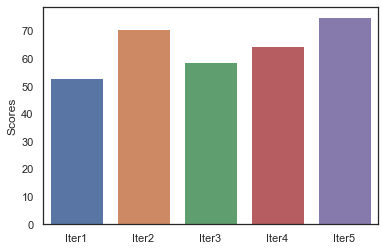

In [13]:
### Visualize accuracy for each iteration
import seaborn as sns
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()

In [14]:
#Shuffle = False
from sklearn.model_selection import KFold
kf = KFold(n_splits=5,shuffle=False)
kf.get_n_splits(dataFeatures)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [15]:
from sklearn import tree
from sklearn.metrics import accuracy_score
accuracy_model = []
clf = tree.DecisionTreeClassifier(random_state=20) 
# Iterate over each train-test split
for train_index, test_index in kf.split(dataFeatures):
    # Split train-test
    X_train, X_test = dataFeatures[train_index], dataFeatures[test_index]
    y_train, y_test = dataLabels[train_index], dataLabels[test_index]
    # Train the model
    model = clf.fit(X_train, y_train)
    # Append to accuracy_model the accuracy of the model
    accuracy_model.append(accuracy_score(y_test, model.predict(X_test), normalize=True)*100)
 
#Print the accuracy    
print(accuracy_model)

[47.05882352941176, 58.82352941176471, 58.82352941176471, 52.94117647058824, 50.0]


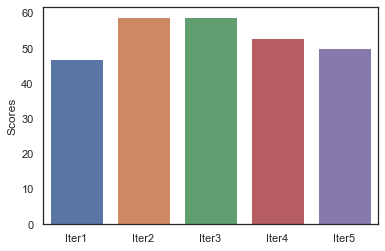

In [16]:
### Visualize accuracy for each iteration
import seaborn as sns
scores = pd.DataFrame(accuracy_model,columns=['Scores'])
 
sns.set(style="white", rc={"lines.linewidth": 3})
sns.barplot(x=['Iter1','Iter2','Iter3','Iter4','Iter5'],y="Scores",data=scores)
plt.show()
sns.set()